***Credit card Fraud Detection with Machine Learning***
*Student Name: Bekzod Mannapbekov*

Student ID: 210872000

Course: Msc Big Data Science

This project relies on my previously completed assignments from Data Mining and Machine Learning at QMUL



Additional references:
https://www.springboard.com/blog/data-analytics/naive-bayes-classification/

http://www.devdoc.net/python/sklearn-0.18/auto_examples/model_selection/plot_learning_curve.html

https://github.com/yzhao062/anomaly-detection-resources

https://github.com/topics/data-cleansing

https://stackoverflow.com/questions/66219835/sklearn-linear-svm-cannot-train-in-multilabel-classification

Dataset was to big even after compressing here is the link to the dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


Importing libraries for the given challange

In [1]:
#helps to visualise data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to preform subsampling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#to split into train and test
from sklearn.model_selection import train_test_split
#importing classifiers 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#hyperparameter tuner
import optuna
#RUC-AUC cruve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [41]:
!pip install optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 6.0 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 209 kB 40.7 MB/s 
     |████████████████████████████████| 78 kB 4.0 MB/s 
     |████████████████████████████████| 147 kB 57.7 MB/s 
     |████████████████████████████████| 112 kB 48.8 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=8a39ce0418d1a845081e499e85409b3f62f8e55b4614d418cc70e65eb7024278
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


**Understanding the shape of the data**

In [2]:
df0 = pd.read_csv('creditTransac.csv')
df0

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211990 entries, 0 to 211989
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    211990 non-null  float64
 1   V1      211990 non-null  float64
 2   V2      211990 non-null  float64
 3   V3      211990 non-null  float64
 4   V4      211990 non-null  float64
 5   V5      211990 non-null  float64
 6   V6      211990 non-null  float64
 7   V7      211990 non-null  float64
 8   V8      211990 non-null  float64
 9   V9      211990 non-null  float64
 10  V10     211989 non-null  float64
 11  V11     211989 non-null  float64
 12  V12     211989 non-null  float64
 13  V13     211989 non-null  float64
 14  V14     211989 non-null  float64
 15  V15     211989 non-null  float64
 16  V16     211989 non-null  float64
 17  V17     211989 non-null  float64
 18  V18     211989 non-null  float64
 19  V19     211989 non-null  float64
 20  V20     211989 non-null  float64
 21  V21     21

In [4]:
df0.describe()

Time             V1             V2             V3  \
count  211990.000000  211990.000000  211990.000000  211990.000000   
mean    74338.899245      -0.082446      -0.004057       0.255986   
std     36867.401364       1.909113       1.631394       1.467115   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     45761.000000      -0.953498      -0.589128      -0.445879   
50%     69773.000000      -0.058291       0.075315       0.437946   
75%    112066.750000       1.227441       0.781114       1.189327   
max    138664.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  211990.000000  211990.000000  211990.000000  211990.000000   
mean        0.060509      -0.087386       0.040294      -0.038154   
std         1.404102       1.364220       1.315733       1.218483   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.807693      -0.766842      -0.719268      -0.571768   
50%         0.061376      -0.146809      -0.226442      -0.000192   
75%         0.863249       0.498306       0.440132       0.517127   
max        16.875344      34.801666      22.529298      36.677268   

                  V8             V9  ...            V21            V22  \
count  211990.000000  211990.000000  ...  211989.000000  211989.000000   
mean        0.010719       0.006475  ...      -0.010891      -0.035568   
std         1.205495       1.130097  ...       0.736679       0.699081   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.187794      -0.662056  ...      -0.226214      -0.534973   
50%         0.038178      -0.070713  ...      -0.039158      -0.023523   
75%         0.334601       0.620404  ...       0.159354       0.446748   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  211989.000000  211989.000000  211989.000000  211989.000000   
mean       -0.013398       0.002730       0.050026       0.004273   
std         0.617944       0.604731       0.499528       0.487487   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.168097      -0.345598      -0.256227      -0.331384   
50%        -0.026425       0.050242       0.090839      -0.061591   
75%         0.120191       0.424426       0.379590       0.257339   
max        19.002942       4.022866       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  211989.000000  211989.000000  211989.000000  211989.000000  
mean        0.000826       0.001469      90.103802       0.001859  
std         0.395790       0.318663     248.408194       0.043071  
min       -22.565679     -11.710896       0.000000       0.000000  
25%        -0.068392      -0.044879       5.990000       0.000000  
50%         0.004778       0.017286      23.080000       0.000000  
75%         0.088927       0.077860      79.740000       0.000000  
max        12.152401      33.847808   19656.530000       1.000000  

[8 rows x 31 columns]

**Cleaning some data and explore**

In [3]:
#checking whether there are any missing values or no
df0.columns[df0.isna().any()]

Index([], dtype='object')

There are none

Time      V1      V2      V3      V4      V5      V6      V7      V8  \
Class                                                                           
0      284315  284315  284315  284315  284315  284315  284315  284315  284315   
1         492     492     492     492     492     492     492     492     492   

           V9  ...     V20     V21     V22     V23     V24     V25     V26  \
Class          ...                                                           
0      284315  ...  284315  284315  284315  284315  284315  284315  284315   
1         492  ...     492     492     492     492     492     492     492   

          V27     V28  Amount  
Class                          
0      284315  284315  284315  
1         492     492     492  

[2 rows x 30 columns]

<AxesSubplot:xlabel='Class', ylabel='count'>

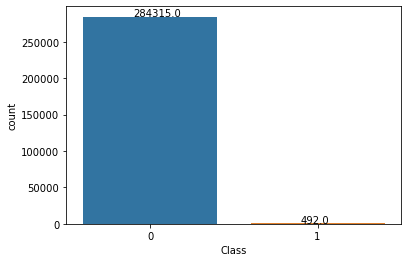

In [4]:
#lets see how many fraud transactions and valid transactions
display(df0.groupby("Class").count())


class_bar=sns.countplot(x=df0["Class"])
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar


the plot shows massive difference between fraud and valid transactions 0=valid 1=fraud


/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


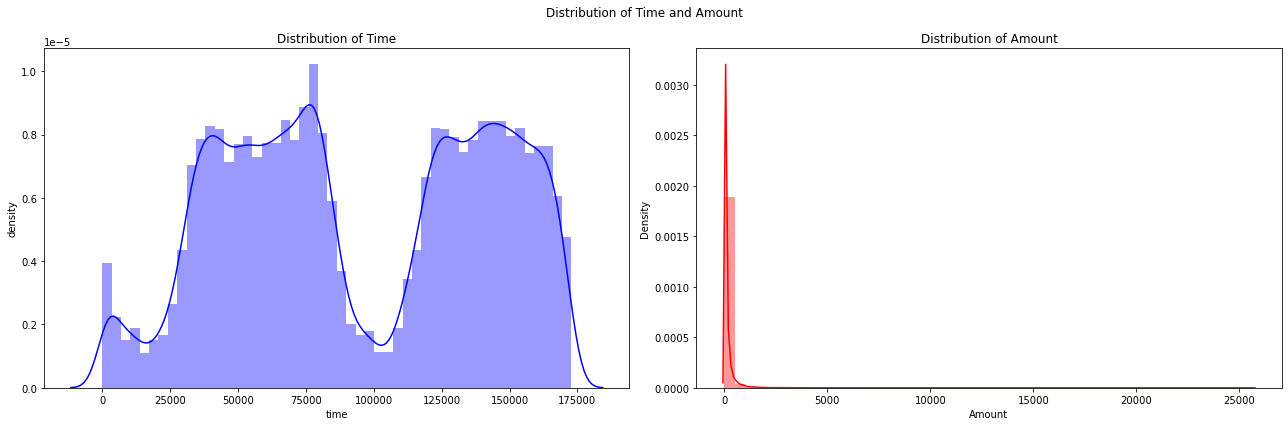

In [5]:
#plotting diagrams to visually understand distribution of amount and time data
fig = plt.figure(figsize = (18,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#distribution of Amount
sns.distplot(df0["Amount"], ax=ax2, color = 'red')
ax2.set_xlabel("Amount")
ax2.set_ylabel("Density")
ax2.set_title("Distribution of Amount")
#Distribution of time
sns.distplot(df0["Time"],ax=ax1,color="Blue")
ax1.set_xlabel("time")
ax1.set_ylabel("density")
ax1.set_title("Distribution of Time")

# distribution of both as heading
fig.suptitle("Distribution of Time and Amount")
plt.tight_layout()
plt.show()

Results and are skewed it needs subsampling 

Next step is prepocessing with StandardScaler and RobustScaler

In [6]:
scaler = StandardScaler()
robust = RobustScaler()
#preprocessing TIme
scaled_time=robust.fit_transform(df0["Time"].values.reshape(-1,1))
#preprocessing Amount
scaled_amount=robust.fit_transform(df0["Amount"].values.reshape(-1,1))

# making a copy of the orginal dataset just in case
df1=df0.copy()

In [7]:
#inserting scaled time
df1.insert(0,"scaled_time",scaled_time)
#inserting scaled amount
df1.insert(1,"scaled_amount",scaled_amount)
#dropping original time and amount
df1_scaled=df1.drop(columns=["Time","Amount"])
display(df1_scaled)

scaled_time  scaled_amount         V1         V2        V3        V4  \
0         -0.994983       1.783274  -1.359807  -0.072781  2.536347  1.378155   
1         -0.994983      -0.269825   1.191857   0.266151  0.166480  0.448154   
2         -0.994972       4.983721  -1.358354  -1.340163  1.773209  0.379780   
3         -0.994972       1.418291  -0.966272  -0.185226  1.792993 -0.863291   
4         -0.994960       0.670579  -1.158233   0.877737  1.548718  0.403034   
...             ...            ...        ...        ...       ...       ...   
284802     1.034951      -0.296653 -11.881118  10.071785 -9.834783 -2.066656   
284803     1.034963       0.038986  -0.732789  -0.055080  2.035030 -0.738589   
284804     1.034975       0.641096   1.919565  -0.301254 -3.249640 -0.557828   
284805     1.034975      -0.167680  -0.240440   0.530483  0.702510  0.689799   
284806     1.035022       2.724796  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V20       V21  \
0      -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307   
1       0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775   
2      -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998   
3      -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300   
4      -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -5.364473 -2.606837 -4.918215  7.305334  ...  1.475829  0.213454   
284803  0.868229  1.058415  0.024330  0.294869  ...  0.059616  0.214205   
284804  2.630515  3.031260 -0.296827  0.708417  ...  0.001396  0.232045   
284805 -0.377961  0.623708 -0.686180  0.679145  ...  0.127434  0.265245   
284806 -0.012546 -0.649617  1.577006 -0.414650  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

Sub-Sampling the data by creating new table where the number of fraud transactions is equal to valid transactions.

In [8]:
#randomising the data with the help of shuffling 
df1_scaled = df1_scaled.sample(frac=1)  

df1_scaled_nf = df1_scaled.loc[df1["Class"] == 0][:492]
df1_scaled_f = df1_scaled.loc[df1["Class"]==1]

# all the fraud points are used while valid transactions are deducted to 492 cases in randomised order.
# creating new sampled data
df1_distributed = pd.concat([df1_scaled_nf,df1_scaled_f])
df2 = df1_distributed.sample(frac=1, random_state=42)

df2.head()

scaled_time  scaled_amount         V1         V2         V3  \
43428     -0.507372       4.781527 -16.526507   8.584972 -18.649853   
114725    -0.130323       2.207783  -2.412787  -2.068720   0.381423   
151462     0.127668      -0.284636 -16.308650  11.614801 -19.739386   
254618     0.847414      -0.095997  -6.366974   4.908582  -1.676553   
182578     0.479023       1.086984  -1.677470   0.051075   0.953575   

               V4         V5        V6         V7        V8  ...       V20  \
43428    9.505594 -13.793819 -2.832404 -16.701694  7.517344  ... -1.514923   
114725  -1.474190   0.673077 -0.498795  -0.739185  0.714813  ...  0.974214   
151462  10.463866 -12.599146 -1.202393 -23.380508 -5.781133  ...  2.106034   
254618   2.633473  -2.070954  1.959843  -3.642810 -3.174741  ... -1.746416   
182578  -0.996796   0.511548 -0.146886   0.428505  0.576723  ...  0.073209   

             V21       V22       V23       V24       V25       V26       V27  \
43428   1.190739 -1.127670 -2.358579  0.673461 -1.413700 -0.462762 -2.018575   
114725  0.399735 -0.000551  0.176421 -1.365259  0.046471 -0.351901  0.207747   
151462 -4.884983  1.140910  1.392953  0.348997 -2.167510 -0.798754 -2.942775   
254618  5.971038 -0.995184  0.761710 -0.621929 -0.172272  0.011821 -1.780545   
182578 -0.302427 -1.365068 -0.090898 -1.167901  0.678219 -0.966045 -0.089105   

             V28  Class  
43428  -1.042804      1  
114725 -0.186755      0  
151462 -0.462680      1  
254618 -0.260594      0  
182578 -0.105509      0  

[5 rows x 31 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


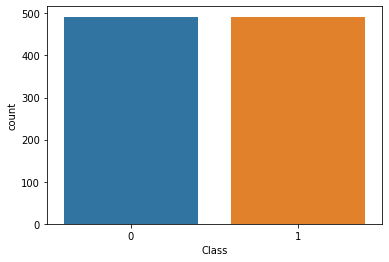

In [19]:
#plotting to see the number of valid transactions to a number of fraud transactions
sub_sample_plot=sns.countplot(df2["Class"])
sub_sample_plot

The next step is Feature Engineering

/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


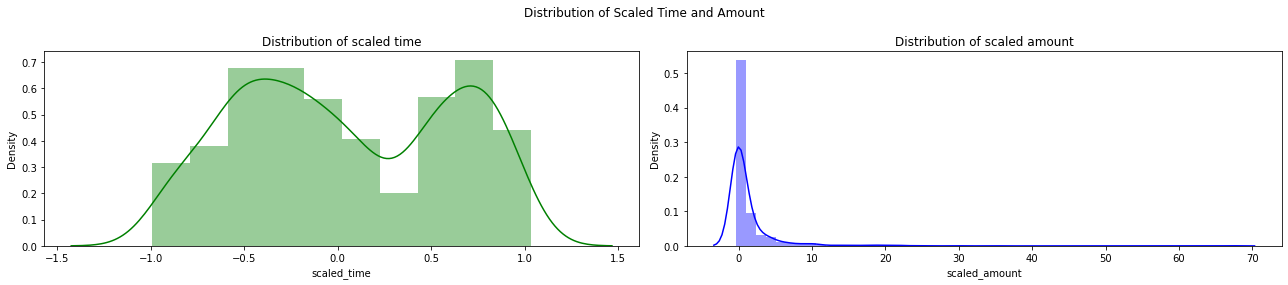

In [9]:
# Distribution plot of time and amount for sub sample

fig = plt.figure(figsize = (18,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#Plotting distribution of scaled time
sns.distplot(df2["scaled_time"],ax=ax1, color="green")
ax1.set_title("Distribution of scaled time")
#plotting distribution of scaled amount
sns.distplot(df2["scaled_amount"],ax=ax2, color="blue")
ax2.set_title("Distribution of scaled amount")
# assigning title 
fig.suptitle("Distribution of Scaled Time and Amount")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Sub-sampled Dataset')

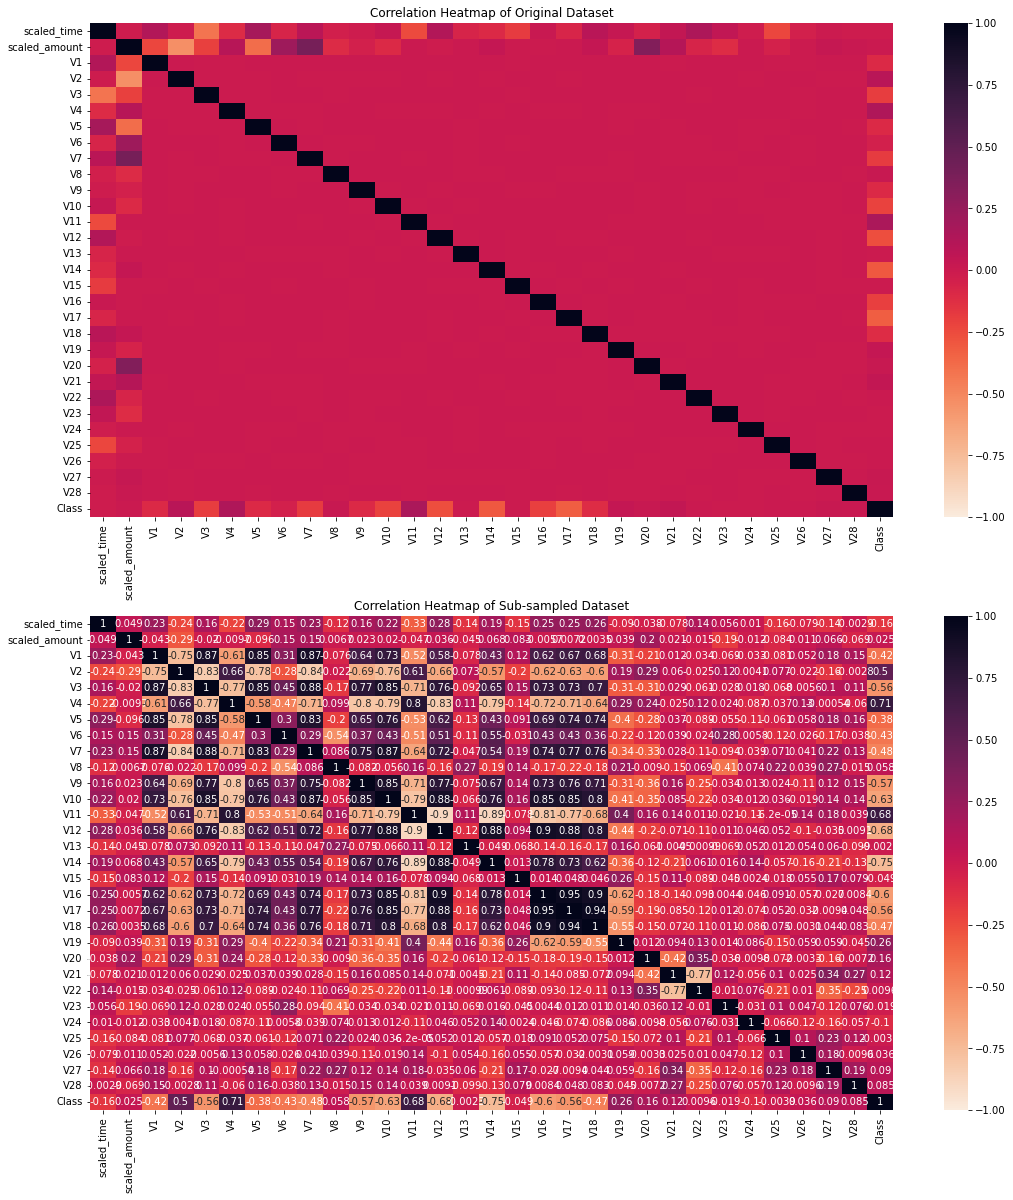

In [10]:
#plotting to see the correlation of the original dataset to sampled dataset
fig = plt.figure(figsize = (18,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#orginal dataset correlation heatmap

sns.heatmap(df1_scaled.corr(),ax=ax1, cmap = "rocket_r",vmin = -1, vmax = 1)
ax1.set_title("Correlation Heatmap of Original Dataset")


#sub-sampled dataset correlation heatmap

sns.heatmap(df2.corr(),ax=ax2, cmap = "rocket_r", vmin = -1, vmax = 1,annot=True)
ax2.set_title("Correlation Heatmap of Sub-sampled Dataset")


With the gathered information from the heatmap the next step is to plot features with positive correlation and negative correlation.

/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

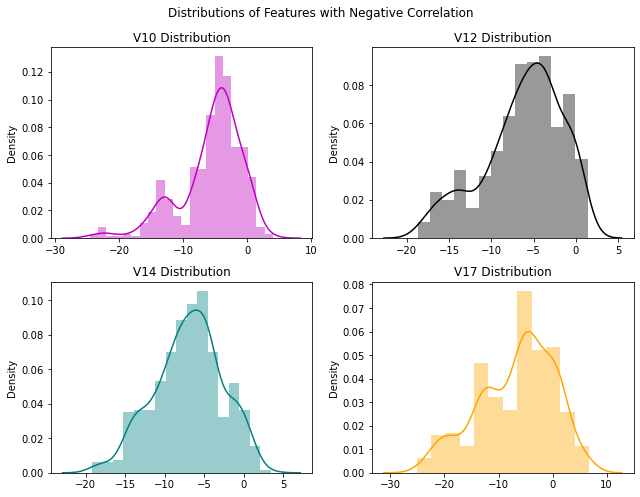

/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bekzod/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

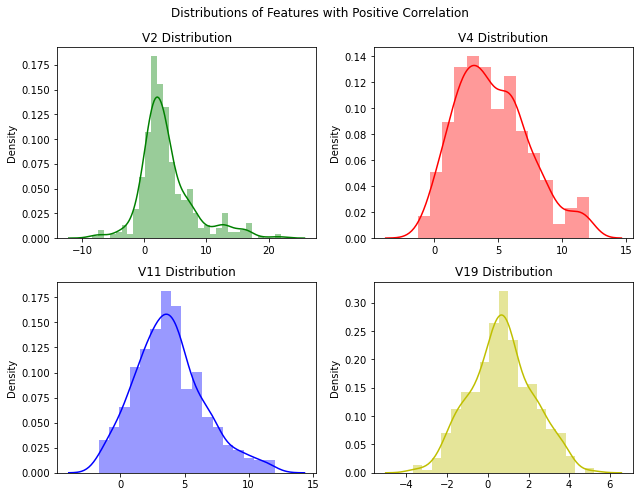

In [11]:
#distribution features with negative correlation
fig2 = plt.figure(figsize = (9,7))
ax5 = fig2.add_subplot(2,2,1)
ax6 = fig2.add_subplot(2,2,2)
ax7 = fig2.add_subplot(2,2,3)
ax8 = fig2.add_subplot(2,2,4)
# v10 distribution feature with negative correlation 
V10_fraud_dist = df2["V10"].loc[df2["Class"]==1].values
sns.distplot(V10_fraud_dist,ax=ax5, color='m')
ax5.set_title("V10 Distribution")
# v12 distribution feature with negative correlation 
V12_fraud_dist = df2["V12"].loc[df2["Class"]==1].values
sns.distplot(V12_fraud_dist,ax=ax6,color='k')
ax6.set_title("V12 Distribution")
# v14 distribution feature with negative correlation 
V14_fraud_dist = df2["V14"].loc[df2["Class"]==1].values
sns.distplot(V14_fraud_dist,ax=ax7,color='teal')
ax7.set_title("V14 Distribution")
# v17 distribution feature with negative correlation 
V17_fraud_dist = df2["V17"].loc[df2["Class"]==1].values
sns.distplot(V17_fraud_dist,ax=ax8,color='orange')
ax8.set_title("V17 Distribution")
#plot distribution features with negative correlation 
fig2.suptitle("Distributions of Features with Negative Correlation")
plt.tight_layout()
plt.show()

#Distribution features with positive correlation 
fig1 = plt.figure(figsize = (9,7))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4)
# V2 distribution feature part of positive correlation 
V2_fraud_dist = df2["V2"].loc[df2["Class"]==1].values
sns.distplot(V2_fraud_dist,ax=ax1,color="g")
ax1.set_title("V2 Distribution")
# v4 distribution feature part of positive correlation 
V14_fraud_dist = df2["V4"].loc[df2["Class"]==1].values
sns.distplot(V14_fraud_dist,ax=ax2,color='r')
ax2.set_title("V4 Distribution")
# V11 distribution feature part of possitive correlation 
V11_fraud_dist = df2["V11"].loc[df2["Class"]==1].values
sns.distplot(V11_fraud_dist,ax=ax3, color='b')
ax3.set_title("V11 Distribution")
# v19 distribution feature part of positive correlation 
V19_fraud_dist = df2["V19"].loc[df2["Class"]==1].values
sns.distplot(V19_fraud_dist,ax=ax4, color="y")
ax4.set_title("V19 Distribution")
#plot possitive correlation by grouping them
fig1.suptitle("Distributions of Features with Positive Correlation")
plt.tight_layout()
plt.show()

Box Plots for outliers with positive correlation

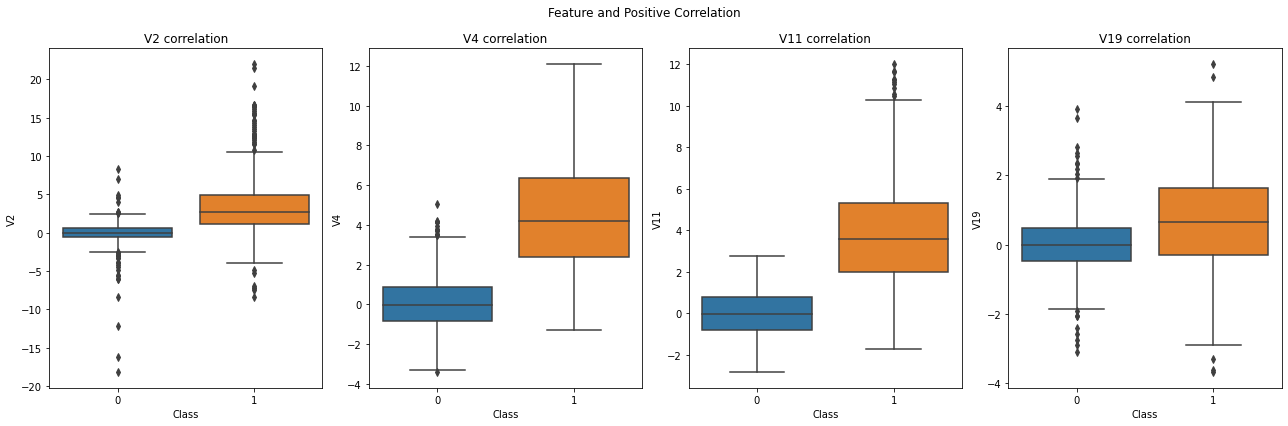

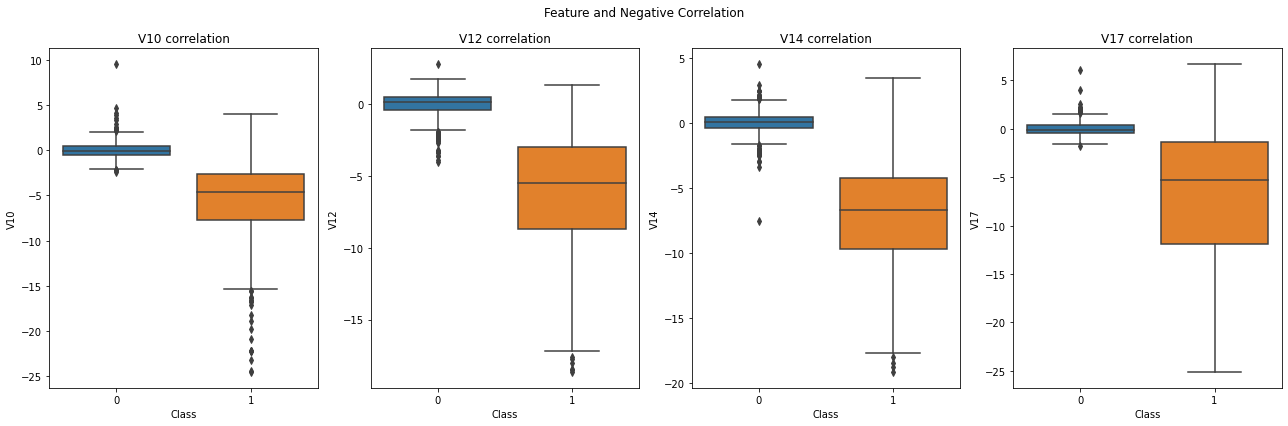

In [12]:
# outliers with positive correlation 

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)
#V2
sns.boxplot(data = df2, x = "Class", y= "V2", ax=ax1)
ax1.set_title("V2 correlation")
#v4
sns.boxplot(data = df2, x = "Class", y= "V4", ax=ax2)
ax2.set_title("V4 correlation")
#v11
sns.boxplot(data = df2, x = "Class", y= "V11", ax=ax3)
ax3.set_title("V11 correlation")
#v19
sns.boxplot(data = df2, x = "Class", y= "V19", ax=ax4)
ax4.set_title("V19 correlation")
#plotting
fig.suptitle("Feature and Positive Correlation")
plt.tight_layout()
plt.show()

# Outliers with Negative Correlations

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)
#v10
sns.boxplot(data = df2, x = "Class", y= "V10", ax=ax1)
ax1.set_title("V10 correlation")
#v12
sns.boxplot(data = df2, x = "Class", y= "V12", ax=ax2)
ax2.set_title("V12 correlation")
#V14
sns.boxplot(data = df2, x = "Class", y= "V14", ax=ax3)
ax3.set_title("V14 correlation")
#V17
sns.boxplot(data = df2, x = "Class", y= "V17", ax=ax4)
ax4.set_title("V17 correlation")
#plotting
fig.suptitle("Feature and Negative Correlation")
plt.tight_layout()
plt.show()

Removing outliers, with the information gathered from the box plots, v2 and v10 have the extreme outliers and they might negatively impact accuracy, therefore, they must be removed.

In [13]:
#calling V2
V2_fraud= df2["V2"].loc[df2["Class"]==1].values
#V2 quartile 1 and 3 choosing the range postive outliers
#Quartile 1
V2_quartile_1 = np.quantile(V2_fraud,0.25)
#quartile 3
V2_quartile_3 = np.quantile(V2_fraud,0.75)
#printing quartile 1
print(f"V2 - quartile 1: {V2_quartile_1}")
#printing quartile 3
print(f"V2 - quartile 3: {V2_quartile_3}")
V2_IQR = V2_quartile_3 - V2_quartile_1
print(f"V2 - IQR: {V2_IQR}")
#upper and lower bounds
V2_lowerbound = V2_quartile_1 - (1.5*V2_IQR)
V2_upperbound = V2_quartile_3 + (1.5*V2_IQR)
print(f"V2 - lowerbound: {V2_lowerbound}")
print(f"V2 - upperbound: {V2_upperbound}")
print(f"Fraud range of V2: {V2_fraud.min()} to {V2_fraud.max()}")

print()
#v10 outliers
#calling v10
V10_fraud= df2["V10"].loc[df2["Class"]==1].values
#v10 quartile 1
V10_quartile_1 = np.quantile(V10_fraud,0.25)
#v10 quartile 3
V10_quartile_3 = np.quantile(V10_fraud,0.75)
#printing 1 and 3 quartiles 
print(f"V10 - quartile 1: {V10_quartile_1}")
print(f"V10 - quartile 3: {V10_quartile_3}")
V10_IQR = V10_quartile_3 - V10_quartile_1
print(f"V10 - IQR: {V10_IQR}")
# lower and upper bound
V10_lowerbound = V10_quartile_1 - 1.5*V10_IQR
V10_upperbound = V10_quartile_3 + 1.5*V10_IQR
#print the bounds
print(f"V10 - lowerbound: {V10_lowerbound}")
print(f"V10 - upperbound: {V10_upperbound}")
print(f"Fraud range of V2: {V10_fraud.min()} to {V10_fraud.max()}")

V2 - quartile 1: 1.1882258198658224
V2 - quartile 3: 4.9712573249056025
V2 - IQR: 3.78303150503978
V2 - lowerbound: -4.486321437693848
V2 - upperbound: 10.645804582465273
Fraud range of V2: -8.40215367768915 to 22.0577289904909

V10 - quartile 1: -7.7566982278474725
V10 - quartile 3: -2.6141839131895623
V10 - IQR: 5.142514314657911
V10 - lowerbound: -15.47046969983434
V10 - upperbound: 5.099587558797303
Fraud range of V2: -24.5882624372475 to 4.03143505114991


In [14]:
#conditions for v2 outliers and v10 outliers
V2_outliers = []
for x in V2_fraud:
    if x < V2_lowerbound or x>V2_upperbound:
        V2_outliers.append(x)
#printing the number of outliers after the condition
print(f"V2 has {len(V2_outliers)} outliers")    
#condition for v10 outliers
V10_outliers = []
for y in V10_fraud:
    if y < V10_lowerbound or y>V10_upperbound:
        V10_outliers.append(y)
#printing number of v10 outliers after the condition
print(f"V10 has {len(V10_outliers)} outliers") 

V2 has 46 outliers
V10 has 19 outliers


In [15]:
# Preparing outliers to drop
# making sure to have a copy of the data before dropping outliers for comparison plots
df3 = df2.copy()
len(df3)


984

In [16]:
#droping outliers V2
df3 = df3.drop(df3[(df3["V2"]<V2_lowerbound) | (df3["V2"]>V2_upperbound)].index)
print(f" Drop V2 {len(df3)}")
#droping outliers v10
df3 = df3.drop(df3[(df3["V10"]<V10_lowerbound) | (df3["V10"]>V10_upperbound)].index)
print(f" Drop V10 {len(df3)}")

 Drop V2 929
 Drop V10 922


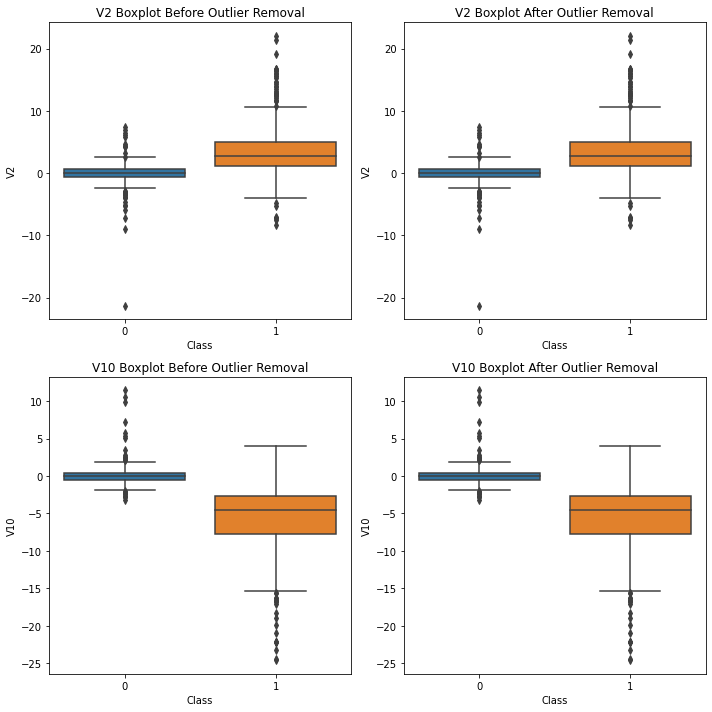

In [64]:
#ploting box plots before and after removal
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
#V2 Boxplot Before Outlier Removal
sns.boxplot(data=df2, x = "Class",y = "V2", ax = ax1)
ax1.set_title("V2 Boxplot Before Outlier Removal")
#V2 Boxplot after Outlier Removal
sns.boxplot(data=df3, x = "Class",y = "V2", ax = ax2)
ax2.set_title("V2 Boxplot After Outlier Removal")
#V10 Boxplot Before Outlier Removal
sns.boxplot(data=df2, x = "Class",y = "V10", ax = ax3)
ax3.set_title("V10 Boxplot Before Outlier Removal")
#V10 V10 Boxplot After Outlier Removal
sns.boxplot(data=df3, x = "Class",y = "V10", ax = ax4)
ax4.set_title("V10 Boxplot After Outlier Removal")

plt.tight_layout()
plt.show()

In [19]:
#spliting into train and test
from sklearn.model_selection import train_test_split

X = df3.drop(["Class"],axis = 1)
Y = df3["Class"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(737, 30)

(185, 30)

(737,)

(185,)

In [65]:
x

3.36734230912012

In [66]:
y

-5.29061006200618

After cleaned data is seperated into train and test, It is time to run classifiers.

#note the accuracy might differ when compared with research paper. it is because every time i run it i get slighty different results.

In [20]:
#running Naive Bayes classifier
clf_NB = GaussianNB()
clf_NB.fit(x_train,y_train)
#accuracy 
print(f"Naive Bayes Score: {round(clf_NB.score(x_test,y_test)*100,2)}%")
#running Support Vector Machine classifier 
clf_SVC = SVC()
clf_SVC.fit(x_train,y_train)
print(f"SVC Score: {round(clf_SVC.score(x_test,y_test)*100,2)}%")
#running K-Nearest Neighbor classifier 
clf_KNC = KNeighborsClassifier()
clf_KNC.fit(x_train,y_train)
print(f"KNC Score: {round(clf_KNC.score(x_test,y_test)*100,2)}%")
#running Logistic Regression classifier 
clf_LR = LogisticRegression()
clf_LR.fit(x_train,y_train)
print(f"Logistric Regression Score: {round(clf_LR.score(x_test,y_test)*100,2)}%")
#note the accuracy might differ when compared with research paper. it is because every time i run it i get slighty different results.

Naive Bayes Score: 91.35%
SVC Score: 92.43%
KNC Score: 93.51%
Logistric Regression Score: 94.59%


Tuning hyperparameters with optuna 

In [21]:
#setting SVM hyperparameter tunning settings
def SVC_objective(trial_SVC):
    kernel = trial_SVC.suggest_categorical("kernel", ["linear", "poly", "rbf",'sigmoid'])
    C = trial_SVC.suggest_float("C",0.12,0.13)
    gamma=trial_SVC.suggest_categorical('gamma',['auto','scale'])
    degree=trial_SVC.suggest_int("degree",1,3,log=True)
    
    model_SVC = SVC(kernel=kernel,C=C,gamma=gamma,degree=degree)
    model_SVC.fit(x_train,y_train)

    return model_SVC.score(x_test,y_test)
# this model preforms the best with default parameters 
def NB_objective(trail_NB):
    model_NB= GaussianNB()
    model_NB.fit(x_train,y_train)

    return model_NB.score(x_test,y_test)
#setting logistic regression tunning settings
def LR_objective(trial_LR):
#     tol = trial_LR.suggest_uniform('tol' , 1e-6 , 1e-3),
    penalty = trial_LR.suggest_categorical("penalty", ["l1", "l2"])
    C = trial_LR.suggest_float("C",0.1,0.15)
#     fit_intercept = trial_LR.suggest_categorical('fit_intercept' , [True, False]),
#     random_state = trial_LR.suggest_categorical('random_state' , [42]),
    solver = trial_LR.suggest_categorical('solver' , ['liblinear'])
    
    model_LR = LogisticRegression(penalty=penalty,C=C,solver=solver)
    model_LR.fit(x_train,y_train)

    return model_LR.score(x_test,y_test)
# KNN setting tunning settings
def KNC_objective(trial_KNC):
    n_neighbors = trial_KNC.suggest_int("n_neighbors", 1, 30)
    algorithm = trial_KNC.suggest_categorical("algorithm",["auto","ball_tree","kd_tree","brute"])
#     weights = trial_KNC.suggest_categorical("weights", ['uniform', 'distance'])
#     metric = trial_KNC.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    
    model_KNC = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm=algorithm)
    model_KNC.fit(x_train,y_train)
    
    return model_KNC.score(x_test,y_test)

In [22]:
#Support Vector Machine 
study_SVC = optuna.create_study(direction='maximize')
#Setting number of trials to 300
study_SVC.optimize(SVC_objective, n_trials=300)

[I 2022-08-15 01:08:55,451] A new study created in memory with name: no-name-b928e013-ce17-4a6e-aae3-807a4c626e1c
[I 2022-08-15 01:08:55,480] Trial 0 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12503980304215953, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:55,500] Trial 1 finished with value: 0.9027027027027027 and parameters: {'kernel': 'poly', 'C': 0.12406577342358374, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:55,518] Trial 2 finished with value: 0.8810810810810811 and parameters: {'kernel': 'sigmoid', 'C': 0.12793207560916783, 'gamma': 'auto', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:55,529] Trial 3 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12459879955879813, 'gamma': 'auto', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 

[I 2022-08-15 01:08:56,062] Trial 35 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12440351897270133, 'gamma': 'auto', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,083] Trial 36 finished with value: 0.9027027027027027 and parameters: {'kernel': 'sigmoid', 'C': 0.12388406689489453, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,096] Trial 37 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12170356131736965, 'gamma': 'auto', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,110] Trial 38 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.1246601585065901, 'gamma': 'scale', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,123] Trial 39 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.1

[I 2022-08-15 01:08:56,643] Trial 71 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.1266098278519428, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,658] Trial 72 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12081713742565464, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,672] Trial 73 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12639181661699395, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,686] Trial 74 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12048292511063922, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:56,709] Trial 75 finished with value: 0.7945945945945946 and parameters: {'kernel': 'poly', 'C': 0.12

[I 2022-08-15 01:08:57,209] Trial 107 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12123351102416499, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,224] Trial 108 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12623676085348648, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,239] Trial 109 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12104932625328725, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,263] Trial 110 finished with value: 0.9081081081081082 and parameters: {'kernel': 'rbf', 'C': 0.12076687674897557, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,277] Trial 111 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C':

[I 2022-08-15 01:08:57,782] Trial 143 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12429896833166544, 'gamma': 'auto', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,796] Trial 144 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12491443731849955, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,811] Trial 145 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12689883071294455, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,826] Trial 146 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12457764812781913, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:57,842] Trial 147 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C

[I 2022-08-15 01:08:58,355] Trial 179 finished with value: 0.9027027027027027 and parameters: {'kernel': 'sigmoid', 'C': 0.12710822929681428, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,370] Trial 180 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12185586415299489, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,386] Trial 181 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12395519308426715, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,403] Trial 182 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12336696062234091, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,418] Trial 183 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C

[I 2022-08-15 01:08:58,925] Trial 215 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.1213992034522239, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,941] Trial 216 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12155140896602318, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,956] Trial 217 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.1218063841060198, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,972] Trial 218 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12699001203823804, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:58,995] Trial 219 finished with value: 0.7945945945945946 and parameters: {'kernel': 'poly', 'C': 

[I 2022-08-15 01:08:59,507] Trial 251 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12216607284011355, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:59,532] Trial 252 finished with value: 0.9081081081081082 and parameters: {'kernel': 'rbf', 'C': 0.12002097254917084, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:59,548] Trial 253 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12960011446327352, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:59,564] Trial 254 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12920346740215305, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:08:59,581] Trial 255 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C':

[I 2022-08-15 01:09:00,128] Trial 287 finished with value: 0.8810810810810811 and parameters: {'kernel': 'sigmoid', 'C': 0.12366746024865972, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:00,144] Trial 288 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12415141916818975, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:00,160] Trial 289 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12442151587877272, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:00,176] Trial 290 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C': 0.12355254586916796, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:00,192] Trial 291 finished with value: 0.9459459459459459 and parameters: {'kernel': 'linear', 'C':

In [23]:
trial_SVC=study_SVC.best_trial
trial_SVC.params,trial_SVC.value
#printing the best hyperparameters for SVM

({'kernel': 'linear', 'C': 0.12503980304215953, 'gamma': 'auto', 'degree': 2},
 0.9459459459459459)

In [24]:
optuna.visualization.plot_param_importances(study_SVC)
#importance of hyperparameters of SVM

In [25]:
#Logistic regression Hyperparameter tuning
study_LR = optuna.create_study(direction='maximize')
#number of trials 300
study_LR.optimize(LR_objective, n_trials=300)


[I 2022-08-15 01:09:11,931] A new study created in memory with name: no-name-99768ae3-3fe9-4509-a45a-0bf488a75856
[I 2022-08-15 01:09:11,951] Trial 0 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.12053575545962855, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:11,957] Trial 1 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13676486806140045, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:11,965] Trial 2 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.12385947648699291, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:11,971] Trial 3 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.12385308728870342, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:11,977] Trial 4 finished with valu

[I 2022-08-15 01:09:12,178] Trial 37 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.1042940970330284, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,184] Trial 38 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.12598223332589448, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,190] Trial 39 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.10327491167829893, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,197] Trial 40 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.1234587763485764, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,203] Trial 41 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.10593276415101344, 'solver': 'liblinear'}. Best 

[I 2022-08-15 01:09:12,389] Trial 74 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.12114657854096247, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,394] Trial 75 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.12574671058674816, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,400] Trial 76 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11610466556333887, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,406] Trial 77 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11983676059563289, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,412] Trial 78 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11507052641175934, 'solver': 'liblinear'}. Bes

[I 2022-08-15 01:09:12,631] Trial 111 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11982332018476403, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,638] Trial 112 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.14744956623788064, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,645] Trial 113 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11535824397456433, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,653] Trial 114 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11251636746109815, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,659] Trial 115 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.14902435616348597, 'solver': 'liblinear'}

[I 2022-08-15 01:09:12,862] Trial 148 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.12377335265328876, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,868] Trial 149 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11640657083408844, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,875] Trial 150 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11893905388413241, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,881] Trial 151 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.1175831626797431, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:12,888] Trial 152 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11868504520163722, 'solver': 'liblinear'}.

[I 2022-08-15 01:09:13,095] Trial 185 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13669057867602127, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,101] Trial 186 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.1325467852903869, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,107] Trial 187 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13405940064713268, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,113] Trial 188 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13020664034199322, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,120] Trial 189 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13062207336169787, 'solver': 'liblinear'}.

[I 2022-08-15 01:09:13,338] Trial 222 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11170686765908339, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,345] Trial 223 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11309411950851458, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,352] Trial 224 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.14815458034696702, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,359] Trial 225 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.11582274528958551, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,366] Trial 226 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.1212038207779127, 'solver': 'liblinear'}.

[I 2022-08-15 01:09:13,589] Trial 259 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13393200212914377, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,595] Trial 260 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.136864038370449, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,601] Trial 261 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.14424622961724162, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,608] Trial 262 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13364470350781724, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,614] Trial 263 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.13251598405040446, 'solver': 'liblinear'}. 

[I 2022-08-15 01:09:13,838] Trial 296 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.12495330286609564, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,844] Trial 297 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.12605691163278918, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,850] Trial 298 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l1', 'C': 0.12133198699431114, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.
[I 2022-08-15 01:09:13,858] Trial 299 finished with value: 0.9459459459459459 and parameters: {'penalty': 'l2', 'C': 0.12382323747834427, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9459459459459459.


In [26]:
trial_LR=study_LR.best_trial
trial_LR.params,trial_LR.value

({'penalty': 'l2', 'C': 0.12053575545962855, 'solver': 'liblinear'},
 0.9459459459459459)

In [27]:
optuna.visualization.plot_param_importances(study_LR)

In [28]:
#KNN hyperparameter tunning 
study_KNC = optuna.create_study(direction='maximize')
#Number of trails 300
study_KNC.optimize(KNC_objective, n_trials=300)

[I 2022-08-15 01:09:21,319] A new study created in memory with name: no-name-b9efe4d8-0e76-4c16-a595-bb1660f97b9d
[I 2022-08-15 01:09:21,344] Trial 0 finished with value: 0.9135135135135135 and parameters: {'n_neighbors': 20, 'algorithm': 'auto'}. Best is trial 0 with value: 0.9135135135135135.
[I 2022-08-15 01:09:21,357] Trial 1 finished with value: 0.9243243243243243 and parameters: {'n_neighbors': 15, 'algorithm': 'auto'}. Best is trial 1 with value: 0.9243243243243243.
[I 2022-08-15 01:09:21,369] Trial 2 finished with value: 0.9135135135135135 and parameters: {'n_neighbors': 23, 'algorithm': 'brute'}. Best is trial 1 with value: 0.9243243243243243.
[I 2022-08-15 01:09:21,387] Trial 3 finished with value: 0.9135135135135135 and parameters: {'n_neighbors': 19, 'algorithm': 'brute'}. Best is trial 1 with value: 0.9243243243243243.
[I 2022-08-15 01:09:21,407] Trial 4 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 11, 'algorithm': 'ball_tree'}. Best is trial 4 w

[I 2022-08-15 01:09:21,856] Trial 41 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 8, 'algorithm': 'brute'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:21,867] Trial 42 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:21,877] Trial 43 finished with value: 0.9351351351351351 and parameters: {'n_neighbors': 5, 'algorithm': 'brute'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:21,889] Trial 44 finished with value: 0.9243243243243243 and parameters: {'n_neighbors': 10, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:21,899] Trial 45 finished with value: 0.918918918918919 and parameters: {'n_neighbors': 26, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:21,909] Trial 46 finished with value: 0.9243243243243243 an

[I 2022-08-15 01:09:22,333] Trial 83 finished with value: 0.9351351351351351 and parameters: {'n_neighbors': 5, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,347] Trial 84 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 9, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,359] Trial 85 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,371] Trial 86 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 3, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,383] Trial 87 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 8, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,395] Trial 88 finished with value: 0.9405405405405

[I 2022-08-15 01:09:22,847] Trial 125 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 8, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,858] Trial 126 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 9, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,868] Trial 127 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,881] Trial 128 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 6, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,891] Trial 129 finished with value: 0.9351351351351351 and parameters: {'n_neighbors': 5, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:22,901] Trial 130 finished with value: 0.9297297297297298

[I 2022-08-15 01:09:23,330] Trial 167 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 8, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,343] Trial 168 finished with value: 0.9243243243243243 and parameters: {'n_neighbors': 15, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,355] Trial 169 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,369] Trial 170 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,381] Trial 171 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 6, 'algorithm': 'brute'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,393] Trial 172 finished with value: 0.94

[I 2022-08-15 01:09:23,833] Trial 209 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 6, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,846] Trial 210 finished with value: 0.9351351351351351 and parameters: {'n_neighbors': 5, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,858] Trial 211 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 6, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,870] Trial 212 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,882] Trial 213 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 8, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:23,893] Trial 214 finished with value: 

[I 2022-08-15 01:09:24,343] Trial 251 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 6, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,354] Trial 252 finished with value: 0.9351351351351351 and parameters: {'n_neighbors': 5, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,365] Trial 253 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'brute'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,379] Trial 254 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,391] Trial 255 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 6, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,402] Trial 256 finished with value: 0.9297297297

[I 2022-08-15 01:09:24,856] Trial 293 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'auto'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,869] Trial 294 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 8, 'algorithm': 'ball_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,881] Trial 295 finished with value: 0.9351351351351351 and parameters: {'n_neighbors': 5, 'algorithm': 'brute'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,894] Trial 296 finished with value: 0.9405405405405406 and parameters: {'n_neighbors': 7, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,908] Trial 297 finished with value: 0.9297297297297298 and parameters: {'n_neighbors': 8, 'algorithm': 'kd_tree'}. Best is trial 12 with value: 0.9405405405405406.
[I 2022-08-15 01:09:24,919] Trial 298 finished with value: 0.9405405

In [29]:
#KNN best parameters
trial_KNC=study_KNC.best_trial
trial_KNC.params,trial_KNC.value

({'n_neighbors': 7, 'algorithm': 'ball_tree'}, 0.9405405405405406)

In [30]:
optuna.visualization.plot_param_importances(study_KNC)

In [31]:
print(f"Tuned SVC returns: {round(trial_SVC.value*100,2)}%")
print(f"Tuned Logistic Regression returns: {round(trial_LR.value*100,2)}%")
print(f"Tuned K Nearest Classifier returns: {round(trial_KNC.value*100,2)}%")
#results might differ from the research paper.

Tuned SVC returns: 94.59%
Tuned Logistic Regression returns: 94.59%
Tuned K Nearest Classifier returns: 94.05%


In [32]:
#getting validation score
from sklearn.model_selection import cross_val_score
#applying the best parameters
SVC_tuned = SVC(kernel = "poly", C= 0.12829286587691946, gamma= 'auto', degree= 3)
LR_tuned = LogisticRegression(penalty = "l1", C = 0.14121820668347934, solver = 'liblinear')
KNC_tuned = KNeighborsClassifier(n_neighbors = 3, algorithm = 'brute')
NB_tuned = GaussianNB()

cv_score_SVC = cross_val_score(SVC_tuned, x_train, y_train, cv=3)
cv_score_LR = cross_val_score(LR_tuned, x_train, y_train, cv=3)
cv_score_KNC = cross_val_score(KNC_tuned, x_train, y_train, cv=3)
cv_score_NB = cross_val_score(NB_tuned, x_train, y_train, cv=3)
#printing
print(f"NB cross validation score = {round(cv_score_NB.mean()*100,2)}%")
print(f"SVC cross validation score = {round(cv_score_SVC.mean()*100,2)}%")
print(f"Logistic Regression cross validation score = {round(cv_score_LR.mean()*100,2)}%")
print(f"K Nearest Classifier cross validation score = {round(cv_score_KNC.mean()*100,2)}%")

NB cross validation score = 90.91%
SVC cross validation score = 92.27%
Logistic Regression cross validation score = 93.76%
K Nearest Classifier cross validation score = 92.4%


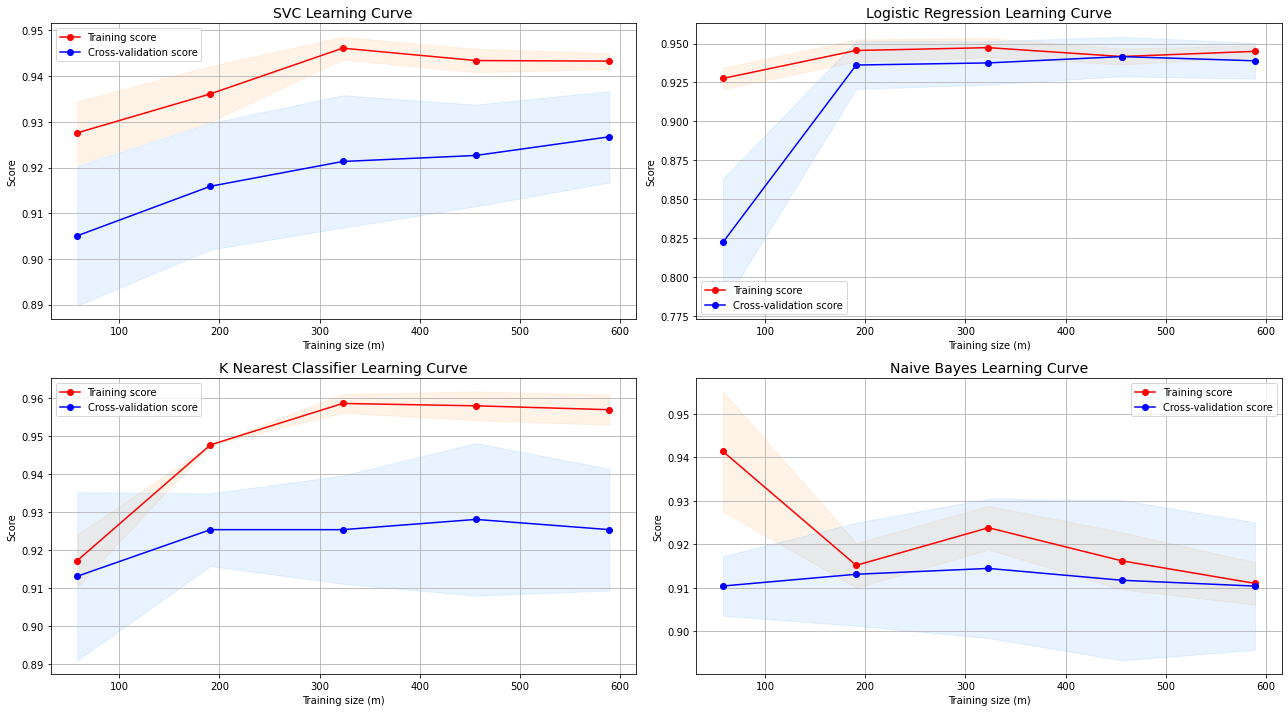

In [33]:
fig = plt.figure(figsize = (18,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
train_sizes = np.linspace(0.1,1.0,5)

# SVM learning curve

train_sizes,train_scores,test_scores = learning_curve(SVC_tuned, x_train, y_train, cv=None, n_jobs=10, train_sizes = train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="red")
ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="blue")
ax1.plot(train_sizes, train_scores_mean, 'o-', color="red",label="Training score")
ax1.plot(train_sizes, test_scores_mean, 'o-', color="blue",label="Cross-validation score")
ax1.set_title("SVC Learning Curve", fontsize=14)
ax1.set_xlabel('Training size (m)')
ax1.set_ylabel('Score')
ax1.grid(True)
ax1.legend(loc="best")

#logistic regression learning curve

train_sizes,train_scores1,test_scores1 = learning_curve(LR_tuned, x_train, y_train, cv=None, n_jobs=10, 
                                                                            train_sizes = train_sizes)
train_scores_mean1 = np.mean(train_scores1, axis=1)
train_scores_std1 = np.std(train_scores1, axis=1)
test_scores_mean1 = np.mean(test_scores1, axis=1)
test_scores_std1 = np.std(test_scores1, axis=1)
ax2.fill_between(train_sizes, train_scores_mean1 - train_scores_std1,train_scores_mean1 + train_scores_std1, alpha=0.1,color="red")
ax2.fill_between(train_sizes, test_scores_mean1 - test_scores_std1,test_scores_mean1 + test_scores_std1, alpha=0.1, color="blue")
ax2.plot(train_sizes, train_scores_mean1, 'o-', color="red",label="Training score")
ax2.plot(train_sizes, test_scores_mean1, 'o-', color="blue",label="Cross-validation score")
ax2.set_title("Logistic Regression Learning Curve", fontsize=14)
ax2.set_xlabel('Training size (m)')
ax2.set_ylabel('Score')
ax2.grid(True)
ax2.legend(loc="best")
#KNN learning curve
train_sizes,train_scores2,test_scores2 = learning_curve(KNC_tuned, x_train, y_train, cv=None, n_jobs=10, train_sizes = train_sizes)
train_scores_mean2 = np.mean(train_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)
ax3.fill_between(train_sizes, train_scores_mean2 - train_scores_std2,train_scores_mean2 + train_scores_std2, alpha=0.1,color="red")
ax3.fill_between(train_sizes, test_scores_mean2 - test_scores_std2,test_scores_mean2 + test_scores_std2, alpha=0.1, color="blue")
ax3.plot(train_sizes, train_scores_mean2, 'o-', color="red",label="Training score")
ax3.plot(train_sizes, test_scores_mean2, 'o-', color="blue",label="Cross-validation score")
ax3.set_title("K Nearest Classifier Learning Curve", fontsize=14)
ax3.set_xlabel('Training size (m)')
ax3.set_ylabel('Score')
ax3.grid(True)
ax3.legend(loc="best")
# Naive Bayes learning curve
train_sizes,train_scores3,test_scores3 = learning_curve(GaussianNB(), x_train, y_train, cv=None, n_jobs=10, train_sizes = train_sizes)
train_scores_mean3 = np.mean(train_scores3, axis=1)
train_scores_std3 = np.std(train_scores3, axis=1)
test_scores_mean3 = np.mean(test_scores3, axis=1)
test_scores_std3 = np.std(test_scores3, axis=1)
ax4.fill_between(train_sizes, train_scores_mean3 - train_scores_std3,train_scores_mean3 + train_scores_std3, alpha=0.1,color="red")
ax4.fill_between(train_sizes, test_scores_mean3 - test_scores_std3,test_scores_mean3 + test_scores_std3, alpha=0.1, color="blue")
ax4.plot(train_sizes, train_scores_mean3, 'o-', color="red",label="Training score")
ax4.plot(train_sizes, test_scores_mean3, 'o-', color="blue",label="Cross-validation score")
ax4.set_title("Naive Bayes Learning Curve", fontsize=14)
ax4.set_xlabel('Training size (m)')
ax4.set_ylabel('Score')
ax4.grid(True)
ax4.legend(loc="best")
#plot
plt.tight_layout()
plt.show()

ROC-AUC curve 

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

SVC_roc_pred = cross_val_predict(SVC_tuned, x_train, y_train, cv=5,
                             method="decision_function")
NB_roc_pred = cross_val_predict(NB_tuned, x_train, y_train, cv=5)
                             

LR_roc_pred = cross_val_predict(LR_tuned, x_train, y_train, cv=5,
                             method="decision_function")

KNC_roc_pred = cross_val_predict(KNC_tuned, x_train, y_train, cv=5)

In [35]:
print(f' SVC ROC score: {roc_auc_score(y_train, SVC_roc_pred)}')
print(f' Logistic Regression ROC score: {roc_auc_score(y_train, LR_roc_pred)}')
print(f' K Nearest Classifier ROC score: {roc_auc_score(y_train, KNC_roc_pred)}')
print(f' Gaussian Naive Bayes: {roc_auc_score(y_train, NB_roc_pred)}')

 SVC ROC score: 0.969045089707271
 Logistic Regression ROC score: 0.9758026440037771
 K Nearest Classifier ROC score: 0.923811526203966
 Gaussian Naive Bayes: 0.9081164423984891


In [36]:
false_positive_rate_SVC, true_positive_rate_SVC, threshold_SVC = roc_curve(y_train, SVC_roc_pred)
false_positive_rate_LR, true_positive_rate_LR, threshold_LR = roc_curve(y_train, LR_roc_pred)
false_positive_rate_KNC, true_positive_rate_KNC, threshold_KNC = roc_curve(y_train, KNC_roc_pred)
false_positive_rate_NB, true_positive_rate_NB, threshold_NB = roc_curve(y_train, NB_roc_pred)

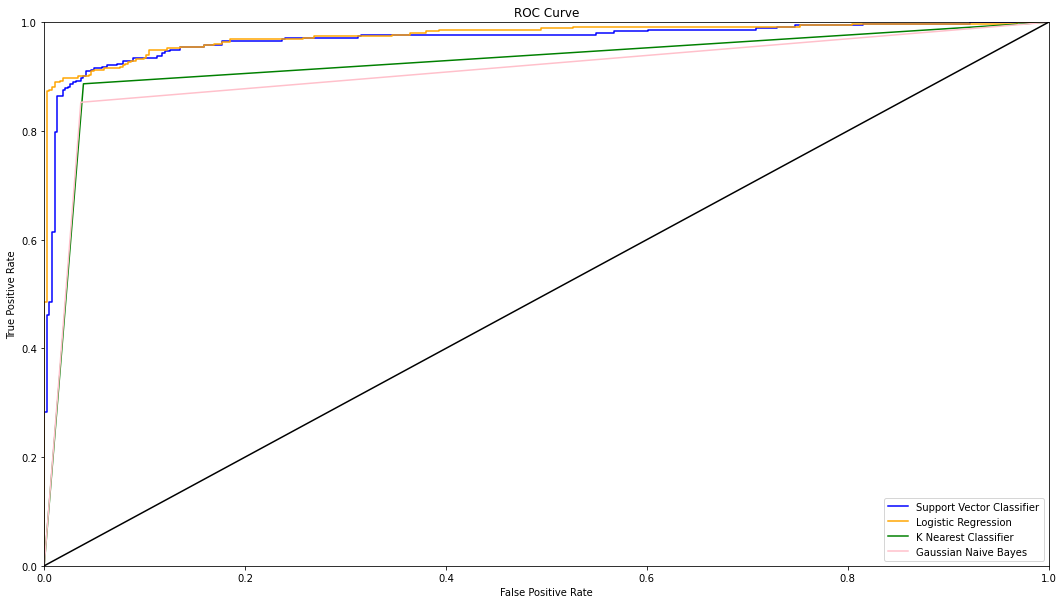

In [37]:
fig = plt.figure(figsize=(18,10))

plt.plot(false_positive_rate_SVC,true_positive_rate_SVC,label="Support Vector Classifier",color="blue")
plt.plot(false_positive_rate_LR,true_positive_rate_LR,label="Logistic Regression",color="orange")
plt.plot(false_positive_rate_KNC,true_positive_rate_KNC,label="K Nearest Classifier",color="green")
plt.plot(false_positive_rate_NB,true_positive_rate_NB,label="Gaussian Naive Bayes",color="pink")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot((0,1),(0,1),color="black")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [38]:
print("The end! Finally!")

The end! Finally!
